In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal
import scipy

In [2]:
def monthly_to_annual(array):
    """ calculate annual mena from monthly data, using unequal month lengths fros noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

def savgol_filter(array, window, order=2):
    smooth_array = array.copy()
    smooth_array[:] = scipy.signal.savgol_filter(array, window, order)
    return(smooth_array)

In [3]:
fin_cdr_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.atm_vars.nc')
fin_cdr_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.lnd_vars.nc')
fin_cdr_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.ocn_vars.nc')
fin_flat10_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.atm_vars.nc')
fin_flat10_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.lnd_vars.nc')
fin_flat10_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.ocn_vars.nc')
fin_zec_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.atm_vars.nc')
fin_zec_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.lnd_vars.nc')
fin_zec_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.ocn_vars.nc')
fin_ctrl_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.atm_vars.nc')
fin_ctrl_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.lnd_vars.nc')
fin_ctrl_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.ocn_vars.nc')

areacella = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
areacello = xr.open_dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

sftlf = xr.open_dataset('sftlf_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftgif = xr.open_dataset('sftgif_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftgif' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Text(0.5, 1.0, 'land sink')

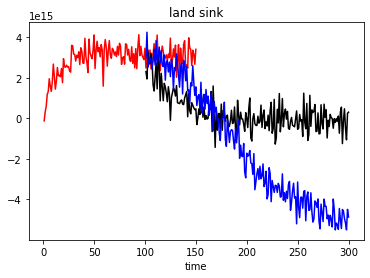

In [4]:
nbp_global_flat10 = (-fin_flat10_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_flat10['time'] = np.arange(len(nbp_global_flat10['time']))/12.
nbp_global_flat10 = (monthly_to_annual(nbp_global_flat10)*86400. * 365.)
nbp_global_flat10.plot(color='red')

nbp_global_zec = (-fin_zec_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_zec['time'] = np.arange(len(nbp_global_zec['time']))/12. + 100.
nbp_global_zec = (monthly_to_annual(nbp_global_zec)*86400. * 365.)
nbp_global_zec.plot(color='black')

nbp_global_cdr = (-fin_cdr_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_cdr['time'] = np.arange(len(nbp_global_cdr['time']))/12. + 100.
nbp_global_cdr = (monthly_to_annual(nbp_global_cdr)*86400. * 365.)
nbp_global_cdr.plot(color='blue')
plt.title('land sink')


Text(0.5, 1.0, 'smoothed land sink')

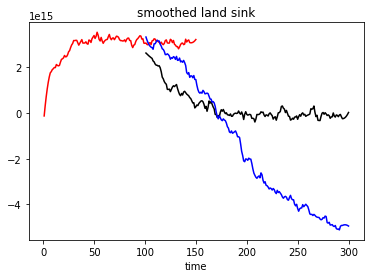

In [5]:
nbp_global_flat10_smooth = savgol_filter(nbp_global_flat10, 13)
nbp_global_zec_smooth = savgol_filter(nbp_global_zec, 13)
nbp_global_cdr_smooth = savgol_filter(nbp_global_cdr, 13)

nbp_global_flat10_smooth.plot(color='red')
nbp_global_zec_smooth.plot(color='black')
nbp_global_cdr_smooth.plot(color='blue')
plt.title('smoothed land sink')

Text(0.5, 1.0, 'ocean sink')

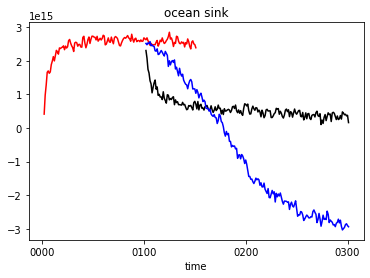

In [6]:
fgco2_global_flat10 = (fin_flat10_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_flat10 = monthly_to_annual(fgco2_global_flat10)
fgco2_global_annual_flat10.plot(color='red')

fgco2_global_zec = (fin_zec_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_zec = monthly_to_annual(fgco2_global_zec)
fgco2_global_annual_zec.plot(color='black')

fgco2_global_cdr = (fin_cdr_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_cdr = monthly_to_annual(fgco2_global_cdr)
fgco2_global_annual_cdr.plot(color='blue')

plt.title('ocean sink')

Text(0.5, 1.0, 'global temperature dynamics')

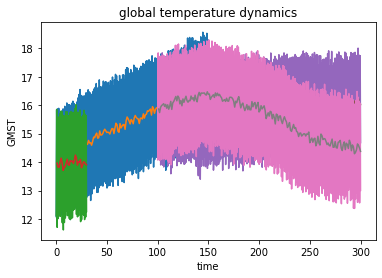

In [7]:
gmst_flat10 =  -273.15 +(fin_flat10_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_flat10['time'] = np.arange(len(gmst_flat10['time']))/12.
gmst_annual_flat10 = monthly_to_annual(gmst_flat10)
gmst_annual_flat10.attrs['long_name'] = 'GMST'
gmst_flat10.attrs['long_name'] = 'GMST'
gmst_flat10.plot()
gmst_annual_flat10.plot()

gmst_ctrl =  -273.15 +(fin_ctrl_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_ctrl['time'] = np.arange(len(gmst_ctrl['time']))/12.
gmst_annual_ctrl = monthly_to_annual(gmst_ctrl)
gmst_annual_ctrl.attrs['long_name'] = 'GMST'
gmst_ctrl.attrs['long_name'] = 'GMST'
gmst_ctrl.plot()
gmst_annual_ctrl.plot()

gmst_zec =  -273.15 +(fin_zec_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_zec['time'] = np.arange(len(gmst_zec['time']))/12. + 100.
gmst_annual_zec = monthly_to_annual(gmst_zec)
gmst_annual_zec.attrs['long_name'] = 'GMST'
gmst_zec.attrs['long_name'] = 'GMST'
gmst_zec.plot()
gmst_annual_zec.plot()

gmst_cdr =  -273.15 +(fin_cdr_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_cdr['time'] = np.arange(len(gmst_cdr['time']))/12. + 100.
gmst_annual_cdr = monthly_to_annual(gmst_cdr)
gmst_annual_cdr.attrs['long_name'] = 'GMST'
gmst_cdr.attrs['long_name'] = 'GMST'
gmst_cdr.plot()
gmst_annual_cdr.plot()


plt.title('global temperature dynamics')

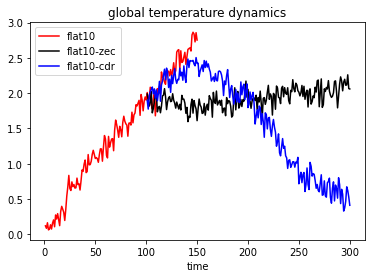

In [8]:
warming_flat10 = gmst_annual_flat10 - gmst_annual_ctrl.mean(dim='time')
warming_zec = gmst_annual_zec - gmst_annual_ctrl.mean(dim='time')
warming_cdr = gmst_annual_cdr - gmst_annual_ctrl.mean(dim='time')

warming_flat10.plot(color='red')
warming_zec.plot(color='black')
warming_cdr.plot(color='blue')

plt.title('global temperature dynamics')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

In [9]:
emiss_flat10 = 10. * gmst_annual_flat10['time']/gmst_annual_flat10['time']
emiss_flat10_cum = emiss_flat10.cumsum()

emiss_zec = 0. * gmst_annual_zec['time']/gmst_annual_zec['time']
emiss_zec_cum = emiss_zec.cumsum() + 1000.

emiss_cdr = gmst_annual_cdr['time']/gmst_annual_cdr['time']
emiss_cdr[0:100] = 10.-0.2*emiss_cdr[0:100]*np.arange(100)
emiss_cdr[100:] = -10.*emiss_cdr[100:]
emiss_cdr_cum = emiss_cdr.cumsum() + 1000.

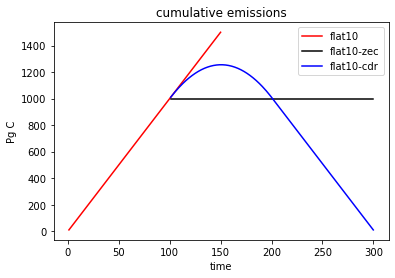

In [10]:
emiss_flat10_cum.plot(color='red')
emiss_zec_cum.plot(color='black')
emiss_cdr_cum.plot(color='blue')

plt.title('cumulative emissions')
plt.ylabel('Pg C')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

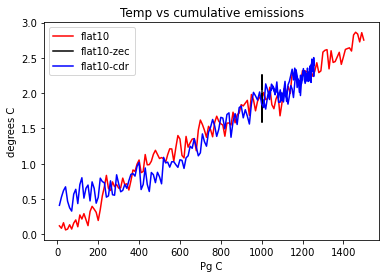

In [11]:
plt.plot(emiss_flat10_cum,warming_flat10, color='red')
plt.plot(emiss_zec_cum,warming_zec, color='black')
plt.plot(emiss_cdr_cum,warming_cdr, color='blue')

plt.title('Temp vs cumulative emissions')
plt.ylabel('degrees C')
plt.xlabel('Pg C')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

In [12]:
warming_flat10_smooth = savgol_filter(warming_flat10, 11)
warming_zec_smooth = savgol_filter(warming_zec, 11)
warming_cdr_smooth = savgol_filter(warming_cdr, 11)


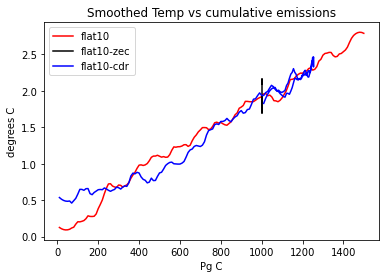

In [13]:
plt.plot(emiss_flat10_cum,warming_flat10_smooth, color='red')
plt.plot(emiss_zec_cum,warming_zec_smooth, color='black')
plt.plot(emiss_cdr_cum,warming_cdr_smooth, color='blue')

plt.title('Smoothed Temp vs cumulative emissions')
plt.ylabel('degrees C')
plt.xlabel('Pg C')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

### define a simple exponential memory function that relates sink strength to prior emissions, and fit to CESM2, starting with the land sink 

In [14]:
def memory(emissions, tau, sens):
    nt = len(emissions)
    sink = np.zeros(nt)
    for t in range(nt):
        r = 0
        for tt in range(t):
            r = r + emissions[tt] * sens * np.exp(-(t-tt)/tau)
        sink[t] = r
    return sink
    

In [15]:
emiss = np.zeros(250)
emiss[100:] = 10.
time = np.arange(len(emiss)) - 100.


landsink_flat10 = np.zeros(250)
landsink_flat10[100:] = nbp_global_flat10.data * 1e-15

In [16]:
params, fit = scipy.optimize.curve_fit(memory, emiss, landsink_flat10, [12., 0.03])
print(params)

[10.44610243  0.0317134 ]


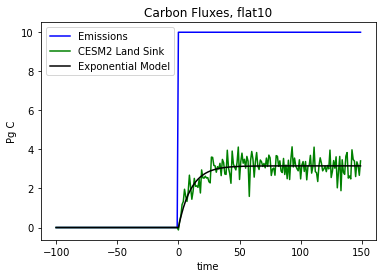

In [17]:
pred_landsink = memory(emiss, params[0], params[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, landsink_flat10, color='green')
plt.plot(time, pred_landsink, color='black')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])

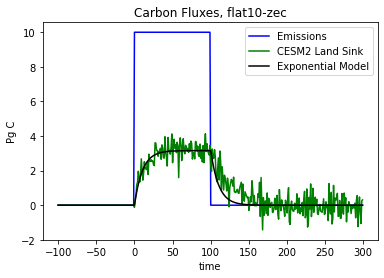

In [18]:
emiss_zec = np.zeros(400)
emiss_zec[100:200] = 10.
time_zec = np.arange(len(emiss_zec)) - 100.

landsink_zec = np.zeros(400)
landsink_zec[100:200] = nbp_global_flat10[0:100].data * 1e-15
landsink_zec[200:] = nbp_global_zec.data * 1e-15

pred_landsink_zec = memory(emiss_zec, params[0], params[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, landsink_zec, color='green')
plt.plot(time_zec, pred_landsink_zec, color='black')

plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])

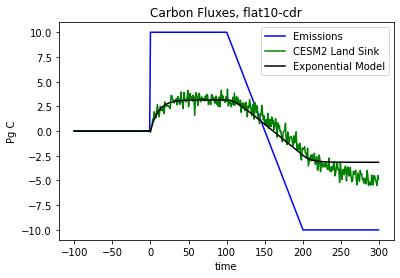

In [19]:
emiss_cdr = np.zeros(400)
emiss_cdr[100:200] = 10.
emiss_cdr[200:300] = 10. - np.arange(100)/5
emiss_cdr[300:400] = -10.

time_cdr = np.arange(len(emiss_cdr)) - 100.

landsink_cdr = np.zeros(400)
landsink_cdr[100:200] = nbp_global_flat10[0:100].data * 1e-15
landsink_cdr[200:] = nbp_global_cdr.data * 1e-15

pred_landsink_cdr = memory(emiss_cdr, params[0], params[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr, color='green')
plt.plot(time_cdr, pred_landsink_cdr, color='black')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])

### Do the same thing, but for the ocean.

In [20]:
oceansink_flat10 = np.zeros(250)
oceansink_flat10[100:] = fgco2_global_annual_flat10.data * 1e-15

params_ocean, fit_ocean = scipy.optimize.curve_fit(memory, emiss, oceansink_flat10, [12., 0.03])
print(params_ocean)

[4.73895798 0.06035708]


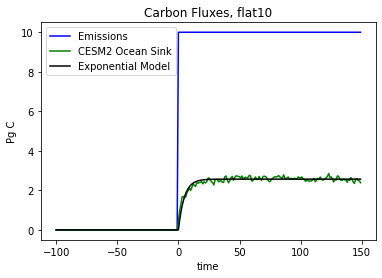

In [21]:
pred_oceansink = memory(emiss, params_ocean[0], params_ocean[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, oceansink_flat10, color='green')
plt.plot(time, pred_oceansink, color='black')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

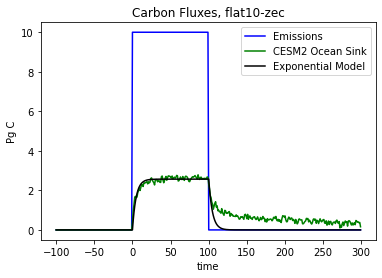

In [22]:
oceansink_zec = np.zeros(400)
oceansink_zec[100:200] = fgco2_global_annual_flat10[0:100].data * 1e-15
oceansink_zec[200:] = fgco2_global_annual_zec.data * 1e-15

pred_oceansink_zec = memory(emiss_zec, params_ocean[0], params_ocean[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec, color='green')
plt.plot(time_zec, pred_oceansink_zec, color='black')

plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

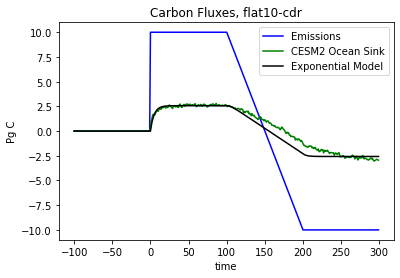

In [23]:
oceansink_cdr = np.zeros(400)
oceansink_cdr[100:200] = fgco2_global_annual_flat10[0:100].data * 1e-15
oceansink_cdr[200:] = fgco2_global_annual_cdr.data * 1e-15

pred_oceansink_cdr = memory(emiss_cdr, params_ocean[0], params_ocean[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, oceansink_cdr, color='green')
plt.plot(time_cdr, pred_oceansink_cdr, color='black')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

### and now do the fit to combined land plus ocean sink

In [24]:
params_total, fit_total = scipy.optimize.curve_fit(memory, emiss, oceansink_flat10 + landsink_flat10, [12., 0.03])
print(params_ocean)

[4.73895798 0.06035708]


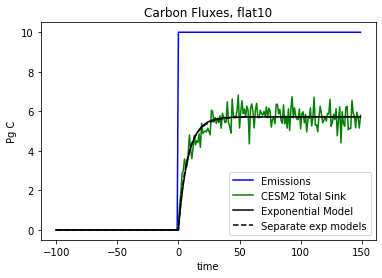

In [25]:
pred_totalsink = memory(emiss, params_total[0], params_total[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, oceansink_flat10 + landsink_flat10, color='green')
plt.plot(time, pred_totalsink, color='black')
plt.plot(time, pred_landsink + pred_oceansink, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

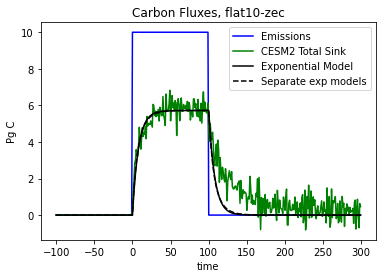

In [26]:
pred_totalsink_zec = memory(emiss_zec, params_total[0], params_total[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec+landsink_zec, color='green')
plt.plot(time_zec, pred_totalsink_zec, color='black')
plt.plot(time_zec, pred_landsink_zec + pred_oceansink_zec, color='black', linestyle='dashed')


plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

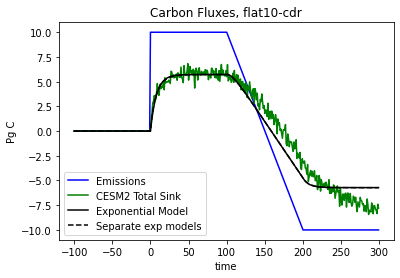

In [27]:
pred_totalsink_cdr = memory(emiss_cdr, params_total[0], params_total[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr+oceansink_cdr, color='green')
plt.plot(time_cdr, pred_totalsink_cdr, color='black')
plt.plot(time_cdr, pred_landsink_cdr + pred_oceansink_cdr, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

### try a two-timescale memory model fit to flat10zec, and apply to flat10-cdr

In [28]:
def memory_2timescale(emissions, tau1, tau2, sens1, sens2):
    nt = len(emissions)
    sink = np.zeros(nt)
    for t in range(nt):
        r = 0
        for tt in range(t):
            r = r + emissions[tt] * (sens1 * np.exp(-(t-tt)/tau1) + sens2 * np.exp(-(t-tt)/tau2))
        sink[t] = r
    return sink
    

In [29]:
params_combined_2timescale, fit_combined_2timescale = scipy.optimize.curve_fit(memory_2timescale, emiss_zec, landsink_zec + oceansink_zec, [10., 100., 0.02, 0.001])
print(params_combined_2timescale)

[4.59572290e+00 6.25595343e+01 9.47477719e-02 5.08351065e-03]


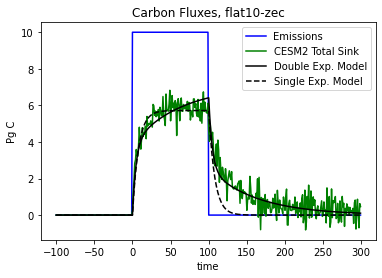

In [30]:
pred_totalsink_2timescale_zec = memory_2timescale(emiss_zec, params_combined_2timescale[0], params_combined_2timescale[1], params_combined_2timescale[2], params_combined_2timescale[3])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec+landsink_zec, color='green')
plt.plot(time_zec, pred_totalsink_2timescale_zec, color='black')
plt.plot(time_cdr, pred_totalsink_zec, color='black', linestyle='dashed')


plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Double Exp. Model', 'Single Exp. Model'])

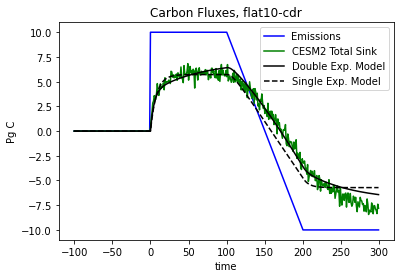

In [31]:
pred_totalsink_2timescale_cdr = memory_2timescale(emiss_cdr, params_combined_2timescale[0], params_combined_2timescale[1], params_combined_2timescale[2], params_combined_2timescale[3])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr+oceansink_cdr, color='green')
plt.plot(time_cdr, pred_totalsink_2timescale_cdr, color='black')
plt.plot(time_cdr, pred_totalsink_cdr, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Double Exp. Model', 'Single Exp. Model'])

Text(0.5, 1.0, 'zonal mean change in temperature, flat10')

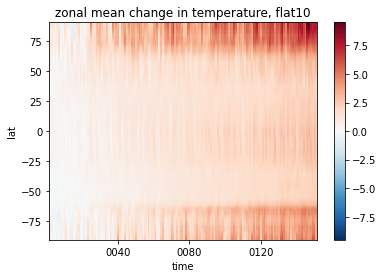

In [32]:
(monthly_to_annual(fin_flat10_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10')


Text(0.5, 1.0, 'zonal mean change in temperature, flat10-cdr')

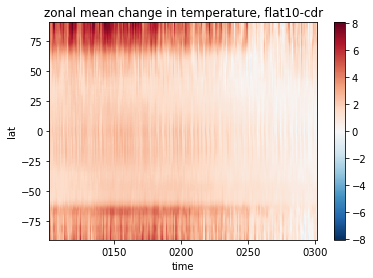

In [33]:
(monthly_to_annual(fin_cdr_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10-cdr')


Text(0.5, 1.0, 'zonal mean change in temperature, flat10-zec')

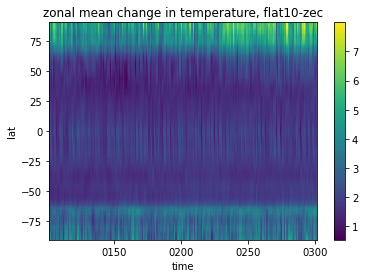

In [34]:
(monthly_to_annual(fin_zec_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10-zec')


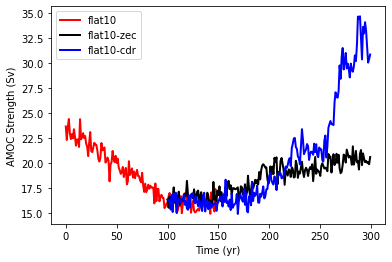

In [35]:
amoc_annual_flat10 = monthly_to_annual(fin_flat10_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_flat10['time'] = np.arange(len(amoc_annual_flat10['time']))
amoc_annual_flat10.attrs['long_name'] = 'Atlantic Meridional Overturning Circulation (Sv)'
amoc_annual_flat10.plot(linewidth=2, color='red')

amoc_annual_zec = monthly_to_annual(fin_zec_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_zec['time'] = np.arange(len(amoc_annual_zec['time'])) + 100.
amoc_annual_zec.plot(linewidth=2, color='black')

amoc_annual_cdr = monthly_to_annual(fin_cdr_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_cdr['time'] = np.arange(len(amoc_annual_cdr['time'])) + 100.
amoc_annual_cdr.plot(linewidth=2, color='blue')

plt.xlabel('Time (yr)')
plt.ylabel('AMOC Strength (Sv)')
plt.legend(['flat10','flat10-zec','flat10-cdr'])
